## Clustering Wheat Seeds with Hierarchical Clustering

In this notebook, we're going to analyze seeds dataset from the UCI Machine Learning Repository ( https://archive.ics.uci.edu/ml/datasets/seeds ). This dataset has a label on them, but since we use this dataset for clustering, we measure the model's precision by the available labels. the seeds belongs to 3 different variants: Kama, Rosa, and Canadian.

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns

In [31]:
#load the dataset
seeds_df = pd.read_csv('seeds_dataset.csv')

#data column
seeds_df.columns = ['ID', 'area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel', 'asymmetryCoefficient', 
                    'lengthOfKernelGroove', 'seedType']

seeds_df.head(5)

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [32]:
print('This dataset has {} observations with {} features'.format(seeds_df.shape[0], seeds_df.shape[1]))

This dataset has 210 observations with 9 features


In [33]:
#excluding ID feature
seeds = seeds_df.copy()
seeds.drop('ID', axis = 1, inplace = True)

seeds.head(5)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [34]:
features = ['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel', 'asymmetryCoefficient', 
            'lengthOfKernelGroove' ]

# Separating out the features
X = seeds.loc[:, features].values

# Separating out the target
y = seeds.loc[:,['seedType']].values

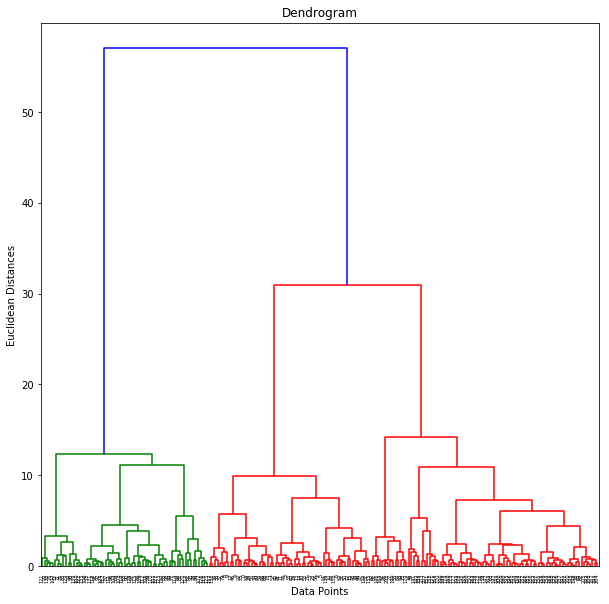

In [35]:
#use dendrogram to find how many classes we have in our data set.
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=[10,10])
merg = linkage(X, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

#### from dendogram, we conclude there are 3 classes in the dataset

In [37]:
#do the clustering with agglomerative clutering
from sklearn.cluster import AgglomerativeClustering

hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
preds = hie_cluster.fit_predict(X)

seeds_hie = seeds.copy(deep=True)
seeds_hie['label'] = preds

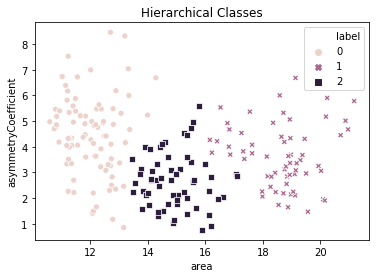

In [38]:
plt.title('Hierarchical Classes')
sns.scatterplot(x='area', y='asymmetryCoefficient', hue='label', style='label', data=seeds_hie)
plt.show()

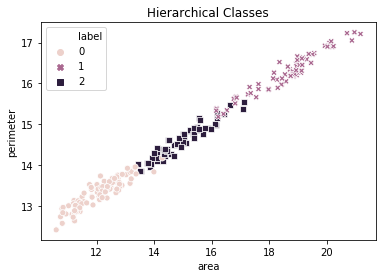

In [39]:
plt.title('Hierarchical Classes')
sns.scatterplot(x='area', y='perimeter', hue='label', style='label', data=seeds_hie)
plt.show()

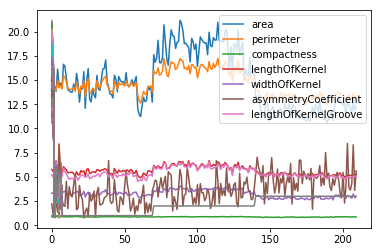

In [41]:
#feature selection by variance
plt.plot(seeds.values)
plt.legend(['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel', 'asymmetryCoefficient', 
                    'lengthOfKernelGroove'])
for idx ,row in enumerate (seeds.iloc[ : ].values ):
    plt.plot(row , label= 'row')

In [49]:
print(preds)
print(seeds['seedType'].values)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [52]:
#matching each learned cluster label with the true labels from dataset
from scipy.stats import mode

labels = np.zeros_like(preds)
target = seeds['seedType'].values

for i in range(3):
    mask = (preds == i)
    labels[mask] = mode(target[mask])[0]
    
print(labels)
print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 3 1 1 1 1 1 1
 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 1 1 1 3 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 1 2 1 1 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [51]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(target, labels)

0.8904761904761904

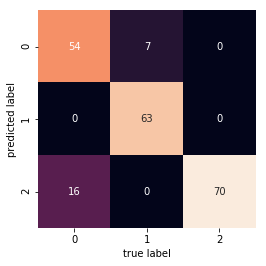

In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

##
# insight:
When compared to k-means clustering, hierarchical clustering has lower accuracy but is not too significant. From the dendrogram, it concludes correctly that the seeds dataset has 3 clusters.